# Probability Theory Review

### Preliminaries

- Goal 
  - Review of probability theory from a logical reasoning viewpoint (i.e., a Bayesian interpretation)
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 12-20       
    - [Bruininkx - 2002 - Bayesian Probability](./files/Bruyninkx-2002-Bayesian-probability.pdf)


### Example Problem: Disease Diagnosis

- **[Question]** Given a disease with prevalence of  1%  and a test procedure  with sensitivity ('true positive' rate) of  95%  and specificity ('true negative' rate) of  85% , what is the chance that somebody who tests positive actually has the disease?

- **[Solution]** Use probabilistic inference, to be discussed in this lecture. 

### Why Probability Theory?

- Probability theory (PT) is the **theory of optimal processing of incomplete information** (see [Cox theorem](https://en.wikipedia.org/wiki/Cox%27s_theorem)), and as such provides a quantitative framework for drawing conclusions from a finite (read: incomplete) data set. 

- Machine learning concerns drawing conclusions from (a finite set of) data and therefore PT is the _optimal calculus for machine learning_. 

- In general, nearly all interesting questions in machine learning can be stated in the following form (a conditional probability):
$$p(\text{whatever-we-want-to-know}\, | \,\text{whatever-we-do-know})$$
  - For example:
    - Predictions
  $$p(\,\text{future-observations}\,|\,\text{past-observations}\,)$$
    - Classify a received data point 
  $$p(\,x\text{-belongs-to-class-}k \,|\,x\,)$$

 
- **Information theory** ("theory of log-probability") provides a source coding view on machine learning that is consistent with probability theory (more in part-2). 

### Probability Theory Notation

-  Define an **event** $A$ as a statement, whose truth is contemplated by a person, e.g.,

$$A = \text{'it will rain tomorrow'}$$
 

- We write the denial of $A$, i.e. the event **not**-A, as $\bar{A}$. 

##### probabilities

- For any event $A$, with background knowledge $I$, the **conditional probability of $A$ given $I$**, is written as 
$$p(A|I)$$

 
- The value of a probability is limited to $0 \le p(A|I) \le 1$.  

- All probabilities are in principle conditional probabilities of the type $p(A|I)$, since there is always some background knowledge. 

  - Still, we often write $p(A)$ rather than $p(A|I)$ if the background knowledge $I$ is assumed to be obviously present. E.g., $p(A)$ rather than $p(\,A\,|\,\text{the-sun-comes-up-tomorrow}\,)$.
 

##### probabilities for random variable assignments

- Note that, if $X$ is a random variable, then the assignment $X=x$ (with $x$ a value) can be interpreted as an event. 

- We often write $p(x)$ rather than $p(X=x)$ (hoping that the reader understands the context ;-)  

- In an apparent effort to further abuse notational conventions, $p(X)$ often denotes the full distribution over random variable $X$, i.e., the distribution for all assignments for $X$. 

##### compound events

- The **joint** probability that both $A$ and $B$ are true, given $I$ (a.k.a. **conjunction**) is written as
$$p(A,B|I)$$

- $A$ and $B$ are said to be **independent**, given $I$,  if (and only if)  $$p(A,B|I) = p(A|I)\,p(B|I)$$ 

- The probability that either $A$ or $B$, or both $A$ and $B$, are true, given $I$ (a.k.a. **disjunction**) is written as 
$$p(A+B|I)$$

### Probability Theory Calculus
 
- **Normalization**. If you know that event $A$ given $I$ is true, then $p(A|I)=1$.

- **Product rule**. The conjuction of two events $A$ and $B$ with given background $I$ is given by 
$$ p(A,B|I) = p(A|B,I)\,p(B|I) \,.$$
  - If $A$ and $B$ are independent given $I$, then $p(A|B,I) = p(A|I)$. 

- **Sum rule**. The disjunction for two events $A$ and $B$ given background $I$ is given by
$$ p(A+B|I) = p(A|I) + p(B|I) - p(A,B|I)\,.$$
  - As a special case, it follows from the sum rule that $ p(A|I) + p(\bar{A}|I) = 1$
  - Note that the background information may not change, e.g., if $I^\prime \neq I$, then 
$$ p(A+B|I^\prime) \neq p(A|I) + p(B|I) - p(A,B|I)\,.$$ 

- **All legitimate probabilistic relations can be derived from the sum and product rules!**

- The product and sum rules are also known as the **axioms of probability theory**, but in fact, under some mild conditions, they can be derived as the unique rules for rational reasoning under uncertainty ([Cox theorem, 1946](https://en.wikipedia.org/wiki/Cox%27s_theorem)).

### Frequentist vs. Bayesian Interpretation of Probabilities

- In the **frequentist** interpretation, $p(A)$ relates to the relative frequency that $A$ would occur under repeated execution of an experiment. 

  - For instance, if the experiment is tossing a coin, then $p(\texttt{tail}) = 0.4$ means that in the limit of a large number of coin tosses, 40% of outcomes turn up as $\texttt{tail}$.     

- In the **Bayesian** interpretation, $p(A)$ reflects the **degree of belief** that event $A$ is true. I.o.w., the probability is associated with a **state-of-knowledge** (usually held by a person). 
  - For instance, for the coin tossing experiment, $p(\texttt{tail}) = 0.4$ should be interpreted as the belief that there is a 40% chance that $\texttt{tail}$ comes up if the coin were tossed.
  - Under the Bayesian interpretation, PT calculus (sum and product rules) **extends boolean logic to rational reasoning with uncertainty**. 

- The Bayesian viewpoint is more generally applicable than the frequentist viewpoint, e.g., it is hard to apply the frequentist viewpoint to the event '$\texttt{it will rain tomorrow}$'. 

- The Bayesian viewpoint is clearly favored in the machine learning community. (In this class, we also strongly favor the Bayesian interpretation). 

### The Sum Rule and Marginalization

- We discussed that every inference problem in PT can be evaluated through the sum and product rules. Next, we present two useful corollaries: (1) Marginalization and (2) Bayes rule 

- If $X$ and $Y$ are random variables over finite domains, than it follows from the sum rule that 
$$
p(X) = \sum_Y p(X,Y) = \sum_Y p(X|Y) p(Y) \,.
$$

- Note that this is just a **generalized sum rule**. In fact, Bishop (p.14) (and some other authors as well) calls this the sum rule.
  - <span style="color:green">EXERCISE: Proof the generalized sum rule.</span>

- Of course, in the continuous domain, the (generalized) sum rule becomes
$$p(X)=\int p(X,Y) \,\mathrm{d}Y$$

- Integrating $Y$ out of a joint distribution is called **marginalization** and the result $p(X)$ is sometimes referred to as the **marginal probability**. 

### The Product Rule and Bayes Rule

- Consider 2 variables $D$ and $\theta$; it follows symmetry arguments that 
$$p(D,\theta)=p(D|\theta)p(\theta)=p(\theta|D)p(D)$$ 
and hence that
$$ p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)}\,.$$ 

- This formula is called **Bayes rule** (or Bayes theorem). While Bayes rule is always true, a particularly useful application occurs when $D$ refers to an observed data set and $\theta$ is set of model parameters that relates to the data. In that case,

  - the **prior** probability $p(\theta)$ represents our **state-of-knowledge** about proper values for $\theta$, before seeing the data $D$.
  - the **posterior** probability $p(\theta|D)$ represents our state-of-knowledge about $\theta$ after we have seen the data.

$\Rightarrow$ Bayes rule tells us how to update our knowledge about model parameters when facing new data. Hence, 

<center>
<div style="border:2px solid red; font-size:x-large; padding:0.5em; color:red">
Bayes rule is the fundamental rule for machine learning!
</div>
</center>

### Bayes Rule Nomenclature
- Some nomenclature associated with Bayes rule:
$$
\underbrace{p(\theta | D)}_{\text{posterior}} = \frac{\overbrace{p(D|\theta)}^{\text{likelihood}} \times \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{p(D)}_{\text{evidence}}}
$$

- Note that the evidence (a.k.a. _marginal likelihood_) can be computed from the numerator through marginalization since
$$ p(D) = \int p(D,\theta) \,\mathrm{d}\theta = \int p(D|\theta)\,p(\theta) \,\mathrm{d}\theta$$

- Hence, likelihood and prior is sufficient to compute both the evidence and the posterior. To emphasize that point, Bayes rule is sometimes written as 
$$ p(\theta|D)\,p(D) = p(D|\theta)\, p(\theta)$$ 

- For given $D$, the posterior probabilities of the parameters scale relatively against each other as
$$
p(\theta|D) \propto p(D|\theta) p(\theta)
$$

$\Longrightarrow$ All that we can learn from the observed data is contained in the likelihood function $p(D|\theta)$. This is called the **likelihood principle**.

### The Likelihood Function vs the Sampling Distribution

- Consider a model $p(D|\theta)$, where $D$ relates to a data set and $\theta$ are model parameters.

- In general, $p(D|\theta)$ is just a function of the two variables $D$ and $\theta$. We distinguish two interpretations of this function, depending on which variable is observed (or given by other means). 

-  The **sampling distribution** (a.k.a. the **data-generating** distribution) $$p(D|\theta=\theta_0)$$ (a function of $D$ only) describes the probability distribution for data $D$, assuming that it is generated by the given model with parameters fixed at $\theta = \theta_0$.

- In a machine learning context, often the data is observed, and $\theta$ is the free variable. For given observations $D=D_0$, the **likelihood function** (which is a function only of the model parameters $\theta$) is defined as $$\mathrm{L}(\theta) \triangleq p(D=D_0|\theta)$$

- Note that $\mathrm{L}(\theta)$ is not a probability distribution for $\theta$ since in general $\sum_\theta \mathrm{L}(\theta) \neq 1$.

- Technically, it is more correct to speak about the likelihood of a model (or model parameters) than about the likelihood of an observed data set. (Why?) 

#### CODE EXAMPLE

Consider the following simple model for the outcome (head or tail) of a biased coin toss with parameter $\theta \in [0,1]$:

$$\begin{align*}
y &\in \{0,1\} \\
p(y|\theta) &\triangleq \theta^y (1-\theta)^{1-y}\\
\end{align*}$$

We can plot both the sampling distribution (i.e. $p(y|\theta=0.8)$) and the likelihood function (i.e. $L(\theta) = p(y=0|\theta)$).

Interact.Checkbox(1: "input" = false Bool , "y", false)

Interact.Options{:SelectionSlider,Any}(2: "input-2" = 0.5 Any , "θ", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

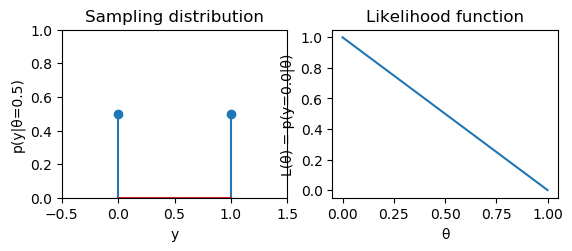

In [1]:
using Reactive, Interact, PyPlot
p(y,θ) = θ.^y .* (1-θ).^(1-y)
f = figure()
@manipulate for y=false, θ=0:0.1:1; withfig(f) do
        # Plot the sampling distribution
        subplot(221); stem([0,1], p([0,1],θ)); 
        title("Sampling distribution"); 
        xlim([-0.5,1.5]); ylim([0,1]); xlabel("y"); ylabel("p(y|θ=$(θ))");
        # Plot the likelihood function
        _θ = linspace(0.0, 1.0, 100)
        subplot(222); plot(_θ, p(convert(Float64,y), _θ)); 
        title("Likelihood function"); 
        xlabel("θ"); 
        ylabel("L(θ) = p(y=$(convert(Float64,y))|θ)");
    end
end

The (discrete) sampling distribution is a valid probability distribution. 
However, the likelihood function $L(\theta)$ clearly isn't, since $\int_0^1 L(\theta) \mathrm{d}\theta \neq 1$. 


### Probabilistic Inference

- **Probabilistic inference** refers to computing
$$
p(\,\text{whatever-we-want-to-know}\, | \,\text{whatever-we-already-know}\,)
$$
  - For example: 
  $$\begin{align*}
 p(\,\text{Mr.S.-killed-Mrs.S.} \;&|\; \text{he-has-her-blood-on-his-shirt}\,) \\
 p(\,\text{transmitted-codeword} \;&|\;\text{received-codeword}\,) 
  \end{align*}$$

- This can be accomplished by repeated application of sum and product rules.

- For instance, consider a joint distribution $p(X,Y,Z)$. Assume we are interested in $p(X|Z)$:
$$\begin{align*}
p(X|Z) \stackrel{p}{=} \frac{p(X,Z)}{p(Z)} \stackrel{s}{=} \frac{\sum_Y p(X,Y,Z)}{\sum_{X,Y} p(X,Y,Z)} \,,
\end{align*}$$
where the 's' and 'p' above the equality sign indicate whether the sum or product rule was used. 

- In the rest of this course, we'll encounter many long probabilistic derivations. For each manipulation, you should be able to associate an 's' (for sum rule), a 'p' (for product or Bayes rule) or an 'a' (for a model assumption) above any equality sign. If you can't do that, file a github issue :) 

### Working out the example problem: Disease Diagnosis

- <span style="color:blue">[Question] - </span> Given a disease $D$ with prevalence of $1\%$ and a test procedure $T$ with sensitivity ('true positive' rate) of $95\%$ and specificity ('true negative' rate) of $85\%$, what is the chance that somebody who tests positive actually has the disease?

- <span style="color:blue">[Answer] - </span> The given data are $p(D=1)=0.01$, $p(T=1|D=1)=0.95$ and $p(T=0|D=0)=0.85$. Then according to Bayes rule,

$$\begin{align*}
p( D=1 &| T=1) \\
&= \frac{p(T=1|D=1)p(D=1)}{p(T=1)} \\
&= \frac{p(T=1|D=1)p(D=1)}{p(T=1|D=1)p(D=1)+p(T=1|D=0)p(D=0)} \\
&= \frac{0.95\times0.01}{0.95\times0.01 + 0.15\times0.99} = 0.0601
\end{align*}$$

### Inference Exercise: Bag Counter

- <span style="color:blue">[Question] - </span>  A bag contains one ball, known to be either white or black. A white ball is put in, the bag is shaken,
 and a ball is drawn out, which proves to be white. What is now the
 chance of drawing a white ball?
 

- <span style="color:blue">[Answer] - </span>  Again, use Bayes and marginalization to arrive at $p(\text{white}|\text{data})=2/3$, see homework exercise

- $\Rightarrow$ Note that probabilities describe **a person's state of knowledge** rather than a 'property of nature'.

- <span style="color:green">[Excercise] - Is a speech signal a 'probabilistic' (random) or a deterministic signal?</span> 

### Inference Exercise: Causality?

- <span style="color:blue">[Question] - </span> A dark bag contains five red balls and seven green ones. (a) What is the probability of drawing a red ball on the first draw? Balls are not returned to the bag after each draw. (b) If you know that on the second draw the ball was a green one, what is now the probability of drawing a red ball on the first draw?

- <span style="color:blue">[Answer] - </span> (a) $5/12$. (b) $5/11$, see homework.

- $\Rightarrow$ Again, we conclude that conditional probabilities reflect **implications for a state of knowledge** rather than temporal causality.

### PDF for the Sum of Two Variables

- <span style="color:blue">[Question] - </span> Given two random **independent** variables
$X$ and $Y$, with PDF's $p_x(x)$ and $p_y(y)$. What is the PDF of 
$$Z = X + Y\;?$$

- <span style="color:blue">[Answer] - </span> Let $p_z(z)$ be the probability that $Z$ has value $z$. This occurs if $X$ has some value $x$ and at the same time $Y=z-x$, with joint probability $p_x(x)p_y(z-x)$. Since $x$ can be any value, we sum over all possible values for $x$ to get
$$
p_z (z) = \int_{ - \infty }^\infty  {p_x (x)p_y (z - x)\,\mathrm{d}{x}}
$$     
  - Iow, $p_z(z)$ is the **convolution** of $p_x$ and $p_y$.
 

       
- Note that $p_z(z) \neq p_x(x) + p_y(y)\,$ !!

- $\Rightarrow$ In linear stochastic systems theory, the Fourier Transform of a PDF (i.e., the characteristic function) plays an important computational role.

- [This list](https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions) shows how these convolutions work out for a few common probability distributions. 

#### CODE EXAMPLE

- Consider the PDF of the sum of two independent Gaussians $X$ and $Y$:

$$\begin{align*}
p_X(x) &= \mathcal{N}(\,x\,|\,\mu_X,\sigma_X^2\,) \\ 
p_Y(y) &= \mathcal{N}(\,y\,|\,\mu_Y,\sigma_Y^2\,) \\
Z &= X + Y
\end{align*}$$

- Performing the convolution (nice exercise) yields a Gaussian PDF for $Z$: 

$$
p_Z(z) = \mathcal{N}(\,z\,|\,\mu_X+\mu_Y,\sigma_X^2+\sigma_Y^2\,).
$$

Interact.Options{:SelectionSlider,Any}(6: "input-3" = 0.0 Any , "μx", 0.0, "0.0", 21, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-2.0"=>-2.0,"-1.9"=>-1.9,"-1.8"=>-1.8,"-1.7"=>-1.7,"-1.6"=>-1.6,"-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1…), Dict{Any,Any}(Pair{Any,Any}(1.0, "1.0"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(-0.2, "-0.2"),Pair{Any,Any}(-1.0, "-1.0"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(-1.3, "-1.3"),Pair{Any,Any}(-0.3, "-0.3"),Pair{Any,Any}(-0.6, "-0.6")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(8: "input-4" = 1.0 Any , "σx", 1.0, "1.0", 10, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(1.4, "1.4"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(10: "input-5" = 2.0 Any , "μy", 2.0, "2.0", 21, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(3.4, "3.4"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(2.8, "2.8"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(3.6, "3.6"),Pair{Any,Any}(3.8, "3.8"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(2.2, "2.2")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(12: "input-6" = 0.5 Any , "σy", 0.5, "0.5", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9), Dict{Any,Any}(Pair{Any,Any}(0.4, "0.4"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.6, "0.6"))), Any[], Any[], true, "horizontal")

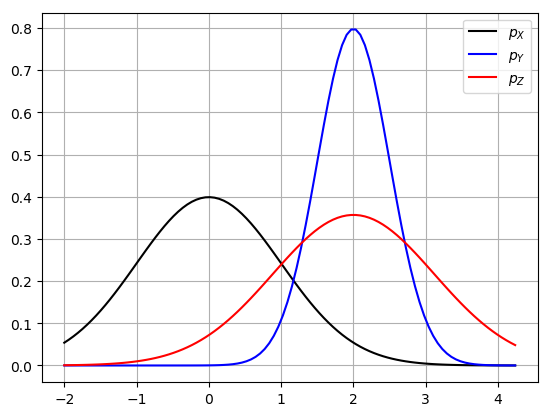

In [2]:
using Reactive, Interact, PyPlot, Distributions
f = figure()
@manipulate for μx=-2:0.1:2, σx=0.1:0.1:1.9,μy=0:0.1:4, σy=0.1:0.1:0.9; withfig(f) do
        μz = μx+μy; σz = sqrt(σx^2 + σy^2)
        x = Normal(μx, σx)
        y = Normal(μy, σy)
        z = Normal(μz, σz)
        range_min = minimum([μx-2*σx, μy-2*σy, μz-2*σz])
        range_max = maximum([μx+2*σx, μy+2*σy, μz+2*σz])
        range = linspace(range_min, range_max, 100)
        plot(range, pdf.(x,range), "k-")
        plot(range, pdf.(y,range), "b-")
        plot(range, pdf.(z,range), "r-")
        legend([L"p_X", L"p_Y", L"p_Z"])
        grid()
    end
end

### Expectation and Variance

- The **expected value** or **mean** is defined as 
$$\mathrm{E}[f] \triangleq  \int f(x) \,p(x) \,\mathrm{d}{x}$$ 

- The **variance** is defined as 
$$\mathrm{var}[f] \triangleq \mathrm{E} \left[(f(x)-\mathrm{E}[f(x)])^2 \right]$$ 

- The **covariance** matrix between _vectors_ $x$ and $y$ is defined as
$$\begin{align*}
    \mathrm{cov}[x,y] &\triangleq \mathrm{E}\left[ (x-\mathrm{E}[x]) (y^T-\mathrm{E}[y^T]) \right]\\
    &= \mathrm{E}[x y^T] - \mathrm{E}[x]\mathrm{E}[y^T]
\end{align*}$$
  -  Also useful as: $\mathrm{E}[xy^T] = \mathrm{cov}[x,y] + \mathrm{E}[x]\mathrm{E}[y^T]$

### Example: Mean and Variance for the Sum of Two Variables

- For any distribution of $x$ and $y$ and $z=x+y$,

\begin{align*}
    \mathrm{E}[z] &= \int_z z \left[\int_x p_x(x)p_y(z-x) \,\mathrm{d}{x} \right] \,\mathrm{d}{z} \\
&= \int_x p_x(x) \left[ \int_z z p_y(z-x)\,\mathrm{d}{z} \right] \,\mathrm{d}{x}  \\
    &= \int_x p_x(x) \left[ \int_{y^\prime} (y^\prime +x)p_y(y^\prime)\,\mathrm{d}{y^\prime} \right] \,\mathrm{d}{x} \notag\\
&= \int_x p_x(x) \left( \mathrm{E}[y]+x \right) \,\mathrm{d}{x} \notag\\
    &= \mathrm{E}[x] + \mathrm{E}[y] \qquad \text{(always; follows from SRG-3a)}
\end{align*}

- Derive as an exercise that

\begin{align*}
\mathrm{var}[z] &= \mathrm{var}[x] + \mathrm{var}[y] + 2\mathrm{cov}[x,y] \qquad \text{(always, see SRG-3b)} \notag\\
    &= \mathrm{var}[x] + \mathrm{var}[y] \qquad \text{(if X and Y are independent)}
\end{align*}


### Linear Transformations

No matter how $x$ is distributed, we can easily derive that **(do as exercise)**

$$\begin{align}
\mathrm{E}[Ax +b] &= A\mathrm{E}[x] + b \tag{SRG-3a}\\
\mathrm{cov}[Ax +b] &= A\,\mathrm{cov}[x]\,A^T \tag{SRG-3b}
\end{align}$$

-  (The tag (SRG-3a) refers to the corresponding eqn number in Sam Roweis' Gaussian Identities notes.)



### Review Probability Theory

- Interpretation as a degree of belief, i.e. a state-of-knowledge, not as a property of nature.

- We can do everything with only the **sum rule** and the **product rule**. In practice, **Bayes rule** and **marginalization** are often very useful for computing

$$p(\,\text{what-we-want-to-know}\,|\,\text{what-we-already-know}\,)\,.$$

- Bayes rule $$ p(\theta|D) = \frac{p(D|\theta)p(\theta)} {p(D)} $$ is the fundamental rule for learning!

- That's really about all you need to know about probability theory, but you need to _really_ know it, so do the exercises.

-----
_The cell below loads the style file_

In [3]:
open("../../styles/aipstyle.html") do f
    display("text/html", readstring(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->